In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
chi_regression = pd.read_csv('mc-chic1.csv') # Read in the files

## Question 1

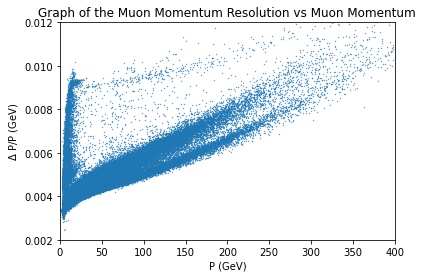

In [21]:
# Part 1 -- Reproducing the graph

plt.scatter(chi_regression.p,chi_regression.ep,s=0.1)
# Limit the axes to only include the bulk of the points
plt.xlim(0,400)
plt.ylim(0.002,0.012)
plt.ylabel("$\Delta$ P/P (GeV)")
plt.xlabel("P (GeV)")
plt.title("Graph of the Muon Momentum Resolution vs Muon Momentum")
plt.show()

## Question 2

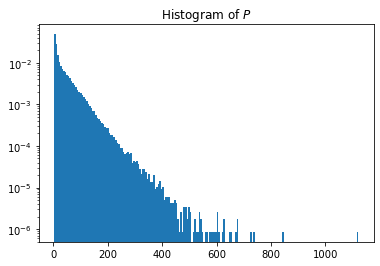

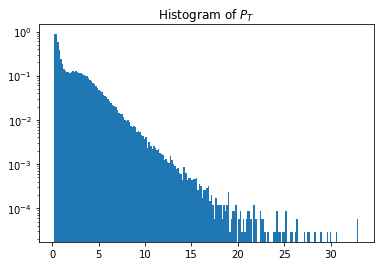

In [4]:
# Part 2 by plotting histograms

plt.hist(chi_regression.p,density=True,log=True,bins=200)
plt.title("Histogram of $P$")
plt.show()
plt.hist(chi_regression.pt,density=True,log=True,bins=200)
plt.title("Histogram of $P_T$")
plt.show()

The histograms look very similar to eachother an their orders of magnitude are very close together. As a result, it is implied that $|P_z| \approx |P|$ and since $|P|=|P_z|+|P_T|$, we can conclude that $P_T<<P_z$.

In [5]:
# Part 2 via appending values

chi_app = chi_regression # redefine the data in case of mistake

pz = np.asarray(np.sqrt(np.square(chi_app.p)-np.square(chi_app.pt))) # define the z momentum
epz = np.asarray(chi_app.ep*(chi_app.p/pz)) #

d = pd.DataFrame({'pz':pz,'epz':epz}) # Create data frames
chi_append = chi_app.join(d) # Append the data frames

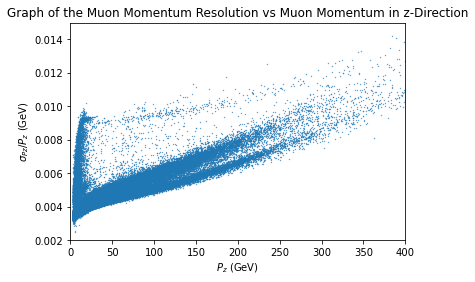

In [22]:
# Part 2 part 2 
plt.scatter(chi_append.pz,chi_append.epz,s=0.1)
plt.ylabel("$\sigma_{Pz}$/$P_z$ (GeV)")
plt.xlabel("$P_z$ (GeV)")
plt.title("Graph of the Muon Momentum Resolution vs Muon Momentum in z-Direction")
# Limit the axes as before
plt.xlim(0,400)
plt.ylim(0.002,0.015)
plt.show()

# This plot looks just like the previous one!

Due to the fact this plot looks virtually identical the one from part 1, it can be assumed again that $|P_z| \approx |P|$. Therefore, this gives further evidence that $P_T << P_z$.

## Question 3

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [8]:
# num of inputs = 5 (p, tx , ty , eta , phi ), num of outputs = 1 (ep)
num_inputs = 5; num_outputs = 1
# simple Keras model : use same # of nodes as # of inputs , single layer
num_nodes = num_inputs

def simple_model():
    # create model
    model = Sequential()
    # no activation required for the output, as this is a regression problem ,
    # ie. we need a numerical prediction for any input
    model.add(Dense(num_nodes,input_dim = num_inputs,kernel_initializer = 'normal',\
    activation ='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_outputs,kernel_initializer ='normal'))
    # Compile model
    model.compile(loss = 'mean_squared_error', optimizer ='adam')
    return model


In [9]:
data = chi_append[['p','tx','ty','eta','phi']].to_numpy() #Create 2d numpy arrays of the data used by the NN
target = chi_append.ep # The target is the error in the momentum

In [10]:
N_epochs = 50 # Use 50 epochs to increase accuracy but keep runtime low
batchSize = 128 # use batch size 128 for the same reason as above
# must always set the random seed for reproducibility
Answer_to_all_questions = 42
np.random.seed(Answer_to_all_questions)
# Simple model estimator
estimator = KerasRegressor(build_fn = simple_model , epochs = N_epochs , batch_size = batchSize )
kfold = KFold( n_splits = 10 , random_state = Answer_to_all_questions , shuffle = True )
# data and target are 5- column and 1- column arrays produced with pandas . DataFrame . values
results = cross_val_score( estimator , data , target , cv = kfold , scoring ='r2')
print ("Standardised:%.5f %s %.5f"%(results.mean(),u"\u00B1 ",results.std()))

C:\ProgramData\Anaconda3\envs\daml\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  import sys


Epoch 1/50
1470/1470 [==============================] - 1s 683us/step - loss: 1.5499e-05
Epoch 2/50
1470/1470 [==============================] - 1s 635us/step - loss: 5.7305e-07
Epoch 3/50
1470/1470 [==============================] - 1s 634us/step - loss: 5.7622e-07
Epoch 4/50
1470/1470 [==============================] - 1s 702us/step - loss: 5.7477e-07
Epoch 5/50
1470/1470 [==============================] - 1s 651us/step - loss: 5.5636e-07
Epoch 6/50
1470/1470 [==============================] - 1s 685us/step - loss: 5.4208e-07
Epoch 7/50
1470/1470 [==============================] - 1s 715us/step - loss: 5.4778e-07
Epoch 8/50
1470/1470 [==============================] - 1s 726us/step - loss: 4.9198e-07
Epoch 9/50
1470/1470 [==============================] - 1s 705us/step - loss: 4.8064e-07
Epoch 10/50
1470/1470 [==============================] - 1s 656us/step - loss: 4.8263e-07
Epoch 11/50
1470/1470 [==============================] - 1s 661us/step - loss: 4.8039e-07
Epoch 12/50
1470/14

1470/1470 [==============================] - 1s 645us/step - loss: 4.7155e-07
Epoch 32/50
1470/1470 [==============================] - 1s 622us/step - loss: 4.7895e-07
Epoch 33/50
1470/1470 [==============================] - 1s 648us/step - loss: 4.7514e-07
Epoch 34/50
1470/1470 [==============================] - 1s 653us/step - loss: 4.7689e-07
Epoch 35/50
1470/1470 [==============================] - 1s 637us/step - loss: 4.8379e-07
Epoch 36/50
1470/1470 [==============================] - 1s 622us/step - loss: 4.7558e-07
Epoch 37/50
1470/1470 [==============================] - 1s 631us/step - loss: 4.7302e-07
Epoch 38/50
1470/1470 [==============================] - 1s 630us/step - loss: 4.7629e-07
Epoch 39/50
1470/1470 [==============================] - 1s 623us/step - loss: 4.8159e-07
Epoch 40/50
1470/1470 [==============================] - 1s 630us/step - loss: 4.7963e-07
Epoch 41/50
1470/1470 [==============================] - 1s 628us/step - loss: 4.7760e-07
Epoch 42/50
1470/1470 

1470/1470 [==============================] - 1s 689us/step - loss: 4.8299e-07
Epoch 13/50
1470/1470 [==============================] - 1s 686us/step - loss: 4.8181e-07
Epoch 14/50
1470/1470 [==============================] - 1s 687us/step - loss: 4.8266e-07
Epoch 15/50
1470/1470 [==============================] - 1s 659us/step - loss: 4.8051e-07
Epoch 16/50
1470/1470 [==============================] - 1s 681us/step - loss: 4.7691e-07
Epoch 17/50
1470/1470 [==============================] - 1s 697us/step - loss: 4.8457e-07
Epoch 18/50
1470/1470 [==============================] - 1s 683us/step - loss: 4.7718e-07
Epoch 19/50
1470/1470 [==============================] - 1s 667us/step - loss: 4.8057e-07
Epoch 20/50
1470/1470 [==============================] - 1s 646us/step - loss: 4.7836e-07
Epoch 21/50
1470/1470 [==============================] - 1s 667us/step - loss: 4.7982e-07
Epoch 22/50
1470/1470 [==============================] - 1s 682us/step - loss: 4.8417e-07
Epoch 23/50
1470/1470 

Despite not giving a very good $R^2$, it runs pretty quick and the loss function converges to a small value. Thus, this batch size (128) and number of epochs (50) will be used for the rest of the checkpoint.

## Question 4

In [11]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn = simple_model, epochs = N_epochs, batch_size = batchSize)))
pipeline = Pipeline(estimators)

N_epochs = 50
batchSize = 128
# must always set the random seed for reproducibility
Answer_to_all_questions = 42
np.random.seed(Answer_to_all_questions)
kfold = KFold( n_splits = 10 , random_state = Answer_to_all_questions , shuffle = True )
# data and target are 5- column and 1- column arrays produced with pandas . DataFrame . values
results_pipe = cross_val_score( pipeline, data, target, cv = kfold, scoring ='r2')
print (" Standardised:%.5f%s%.5f"%(results_pipe.mean(),u"\u00B1 ",results_pipe.std()))

Epoch 1/50


C:\ProgramData\Anaconda3\envs\daml\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  This is separate from the ipykernel package so we can avoid doing imports until


1470/1470 [==============================] - 1s 640us/step - loss: 2.8890e-06
Epoch 2/50
1470/1470 [==============================] - 1s 667us/step - loss: 4.2214e-07
Epoch 3/50
1470/1470 [==============================] - 1s 658us/step - loss: 3.9536e-07
Epoch 4/50
1470/1470 [==============================] - 1s 647us/step - loss: 3.8965e-07
Epoch 5/50
1470/1470 [==============================] - 1s 663us/step - loss: 3.9410e-07
Epoch 6/50
1470/1470 [==============================] - 1s 662us/step - loss: 3.9285e-07
Epoch 7/50
1470/1470 [==============================] - 1s 672us/step - loss: 3.9462e-07
Epoch 8/50
1470/1470 [==============================] - 1s 673us/step - loss: 3.9549e-07
Epoch 9/50
1470/1470 [==============================] - 1s 636us/step - loss: 3.9590e-07
Epoch 10/50
1470/1470 [==============================] - 1s 660us/step - loss: 3.9304e-07
Epoch 11/50
1470/1470 [==============================] - 1s 669us/step - loss: 3.9496e-07
Epoch 12/50
1470/1470 [=======

1470/1470 [==============================] - 1s 628us/step - loss: 3.6851e-07
Epoch 34/50
1470/1470 [==============================] - 1s 637us/step - loss: 3.6756e-07
Epoch 35/50
1470/1470 [==============================] - 1s 637us/step - loss: 3.6874e-07
Epoch 36/50
1470/1470 [==============================] - 1s 596us/step - loss: 3.6606e-07
Epoch 37/50
1470/1470 [==============================] - 1s 624us/step - loss: 3.6430e-07
Epoch 38/50
1470/1470 [==============================] - 1s 607us/step - loss: 3.6931e-07
Epoch 39/50
1470/1470 [==============================] - 1s 638us/step - loss: 3.6606e-07
Epoch 40/50
1470/1470 [==============================] - 1s 618us/step - loss: 3.6745e-07
Epoch 41/50
1470/1470 [==============================] - 1s 636us/step - loss: 3.6770e-07
Epoch 42/50
1470/1470 [==============================] - 1s 652us/step - loss: 3.6802e-07
Epoch 43/50
1470/1470 [==============================] - 1s 686us/step - loss: 3.6983e-07
Epoch 44/50
1470/1470 

1470/1470 [==============================] - 1s 668us/step - loss: 3.9212e-07
Epoch 15/50
1470/1470 [==============================] - 1s 629us/step - loss: 3.9236e-07
Epoch 16/50
1470/1470 [==============================] - 1s 627us/step - loss: 3.9485e-07
Epoch 17/50
1470/1470 [==============================] - 1s 643us/step - loss: 3.8836e-07
Epoch 18/50
1470/1470 [==============================] - 1s 676us/step - loss: 3.9001e-07
Epoch 19/50
1470/1470 [==============================] - 1s 652us/step - loss: 3.9146e-07
Epoch 20/50
1470/1470 [==============================] - 1s 644us/step - loss: 3.9120e-07
Epoch 21/50
1470/1470 [==============================] - 1s 645us/step - loss: 3.9090e-07
Epoch 22/50
1470/1470 [==============================] - 1s 653us/step - loss: 3.9421e-07
Epoch 23/50
1470/1470 [==============================] - 1s 670us/step - loss: 3.9229e-07
Epoch 24/50
1470/1470 [==============================] - 1s 641us/step - loss: 3.9047e-07
Epoch 25/50
1470/1470 

The pipeline estimator is vastly superior to the kerasRegressor estimator as the $R^2$ value is much closer to 1 than the cell above. On top of that, the standard deviation is also much smaller. Therefore, the pipeline estimator will be used for the remainder of this checkpoint.

In [12]:
def denser_model():
    # create model
    model = Sequential()
    # no activation required for the output , as this is a regression problem ,
    # ie. we need a numerical prediction for any input
    model.add(Dense(num_nodes,input_dim = num_inputs,kernel_initializer = 'normal',\
    activation ='relu'))
    model.add(Dropout(0.2))
    # Addition of another layer identical to the one above
    model.add(Dense(num_nodes,input_dim=num_inputs,kernel_initializer='normal',activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_outputs,kernel_initializer ='normal'))
    # Compile model
    model.compile(loss = 'mean_squared_error', optimizer ='adam')
    return model
              
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn = denser_model, epochs = N_epochs, batch_size = batchSize)))
pipeline = Pipeline(estimators)

N_epochs = 50
batchSize = 128
# must always set the random seed for reproducibility
Answer_to_all_questions = 42
np.random.seed(Answer_to_all_questions)
kfold = KFold( n_splits = 10 , random_state = Answer_to_all_questions , shuffle = True )
# data and target are 5- column and 1- column arrays produced with pandas . DataFrame . values
results_deep = cross_val_score( pipeline, data, target, cv = kfold, scoring ='r2')
print (" Standardised:%.5f%s%.5f"%(results_deep.mean(),u"\u00B1 ",results_deep.std()))

Epoch 1/50


C:\ProgramData\Anaconda3\envs\daml\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.


1470/1470 [==============================] - 1s 697us/step - loss: 5.3229e-07
Epoch 2/50
1470/1470 [==============================] - 1s 688us/step - loss: 4.1644e-07
Epoch 3/50
1470/1470 [==============================] - 1s 727us/step - loss: 4.1604e-07
Epoch 4/50
1470/1470 [==============================] - 1s 693us/step - loss: 4.1391e-07
Epoch 5/50
1470/1470 [==============================] - 1s 680us/step - loss: 4.1648e-07
Epoch 6/50
1470/1470 [==============================] - 1s 682us/step - loss: 4.1261e-07
Epoch 7/50
1470/1470 [==============================] - 1s 690us/step - loss: 4.1202e-07
Epoch 8/50
1470/1470 [==============================] - 1s 682us/step - loss: 4.1500e-07
Epoch 9/50
1470/1470 [==============================] - 1s 687us/step - loss: 4.1224e-07
Epoch 10/50
1470/1470 [==============================] - 1s 749us/step - loss: 4.1103e-07
Epoch 11/50
1470/1470 [==============================] - 1s 774us/step - loss: 4.1263e-07
Epoch 12/50
1470/1470 [=======

1470/1470 [==============================] - 1s 745us/step - loss: 5.1023e-07
Epoch 34/50
1470/1470 [==============================] - 1s 718us/step - loss: 5.0914e-07
Epoch 35/50
1470/1470 [==============================] - 1s 696us/step - loss: 5.1015e-07
Epoch 36/50
1470/1470 [==============================] - 1s 693us/step - loss: 5.1393e-07
Epoch 37/50
1470/1470 [==============================] - 1s 685us/step - loss: 5.1167e-07
Epoch 38/50
1470/1470 [==============================] - 1s 759us/step - loss: 5.0769e-07
Epoch 39/50
1470/1470 [==============================] - 1s 760us/step - loss: 4.9850e-07
Epoch 40/50
1470/1470 [==============================] - 1s 741us/step - loss: 5.0747e-07
Epoch 41/50
1470/1470 [==============================] - 1s 679us/step - loss: 5.0085e-07
Epoch 42/50
1470/1470 [==============================] - 1s 709us/step - loss: 5.0652e-07
Epoch 43/50
1470/1470 [==============================] - 1s 718us/step - loss: 5.1641e-07
Epoch 44/50
1470/1470 

1470/1470 [==============================] - 1s 705us/step - loss: 4.2735e-07
Epoch 16/50
1470/1470 [==============================] - 1s 690us/step - loss: 4.2349e-07
Epoch 17/50
1470/1470 [==============================] - 1s 694us/step - loss: 4.3043e-07
Epoch 18/50
1470/1470 [==============================] - 1s 666us/step - loss: 4.2687e-07
Epoch 19/50
1470/1470 [==============================] - 1s 762us/step - loss: 4.2760e-07
Epoch 20/50
1470/1470 [==============================] - 1s 744us/step - loss: 4.2958e-07
Epoch 21/50
1470/1470 [==============================] - 1s 732us/step - loss: 4.2929e-07
Epoch 22/50
1470/1470 [==============================] - 1s 684us/step - loss: 4.2198e-07
Epoch 23/50
1470/1470 [==============================] - 1s 678us/step - loss: 4.2675e-07
Epoch 24/50
1470/1470 [==============================] - 1s 696us/step - loss: 4.2744e-07
Epoch 25/50
1470/1470 [==============================] - 1s 701us/step - loss: 4.2350e-07
Epoch 26/50
1470/1470 

The addition of an extra layer is not as good as having just as single layer. Only marginally however, as it has an $R^2$ difference of 0.03 (and a std deviation difference of 0.002) when compared to simple pipeline architecture.

In [13]:
def wider_model():
    # create model
    model = Sequential()
    # no activation required for the output , as this is a regression problem ,
    # ie. we need a numerical prediction for any input
    # Increase the number of nodes by a factor 2
    model.add(Dense(2*num_nodes,input_dim = num_inputs,kernel_initializer = 'normal',\
    activation ='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_outputs,kernel_initializer ='normal'))
    # Compile model
    model.compile(loss = 'mean_squared_error', optimizer ='adam')
    return model
              
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn = wider_model, epochs = N_epochs, batch_size = batchSize)))
pipeline = Pipeline(estimators)

N_epochs = 50
batchSize = 128
# must always set the random seed for reproducibility
Answer_to_all_questions = 42
np.random.seed(Answer_to_all_questions)
kfold = KFold( n_splits = 10 , random_state = Answer_to_all_questions , shuffle = True )
# data and target are 5- column and 1- column arrays produced with pandas . DataFrame . values
results_wide = cross_val_score( pipeline, data, target, cv = kfold, scoring ='r2')
print (" Standardised:%.5f%s%.5f"%(results_wide.mean(),u"\u00B1 ",results_wide.std()))

Epoch 1/50


C:\ProgramData\Anaconda3\envs\daml\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  app.launch_new_instance()


1470/1470 [==============================] - 1s 647us/step - loss: 2.4244e-06
Epoch 2/50
1470/1470 [==============================] - 1s 664us/step - loss: 3.9114e-07
Epoch 3/50
1470/1470 [==============================] - 1s 674us/step - loss: 3.8348e-07
Epoch 4/50
1470/1470 [==============================] - 1s 701us/step - loss: 3.8359e-07
Epoch 5/50
1470/1470 [==============================] - 1s 652us/step - loss: 3.7857e-07
Epoch 6/50
1470/1470 [==============================] - 1s 676us/step - loss: 3.8126e-07
Epoch 7/50
1470/1470 [==============================] - 1s 666us/step - loss: 3.7799e-07
Epoch 8/50
1470/1470 [==============================] - 1s 684us/step - loss: 3.7902e-07
Epoch 9/50
1470/1470 [==============================] - 1s 665us/step - loss: 3.8209e-07
Epoch 10/50
1470/1470 [==============================] - 1s 694us/step - loss: 3.7585e-07
Epoch 11/50
1470/1470 [==============================] - 1s 700us/step - loss: 3.7905e-07
Epoch 12/50
1470/1470 [=======

1470/1470 [==============================] - 1s 732us/step - loss: 3.6647e-07
Epoch 34/50
1470/1470 [==============================] - 1s 661us/step - loss: 3.6513e-07
Epoch 35/50
1470/1470 [==============================] - 1s 645us/step - loss: 3.6520e-07
Epoch 36/50
1470/1470 [==============================] - 1s 651us/step - loss: 3.6559e-07
Epoch 37/50
1470/1470 [==============================] - 1s 699us/step - loss: 3.6706e-07
Epoch 38/50
1470/1470 [==============================] - 1s 691us/step - loss: 3.6606e-07
Epoch 39/50
1470/1470 [==============================] - 1s 713us/step - loss: 3.6586e-07
Epoch 40/50
1470/1470 [==============================] - 1s 723us/step - loss: 3.6955e-07
Epoch 41/50
1470/1470 [==============================] - 1s 725us/step - loss: 3.7187e-07
Epoch 42/50
1470/1470 [==============================] - 1s 718us/step - loss: 3.6641e-07
Epoch 43/50
1470/1470 [==============================] - 1s 700us/step - loss: 3.6648e-07
Epoch 44/50
1470/1470 

Epoch 15/50
1470/1470 [==============================] - 1s 642us/step - loss: 3.4799e-07
Epoch 16/50
1470/1470 [==============================] - 1s 640us/step - loss: 3.4424e-07
Epoch 17/50
1470/1470 [==============================] - 1s 655us/step - loss: 3.4611e-07
Epoch 18/50
1470/1470 [==============================] - 1s 656us/step - loss: 3.4297e-07
Epoch 19/50
1470/1470 [==============================] - 1s 675us/step - loss: 3.4529e-07 0s - loss: 3.4398
Epoch 20/50
1470/1470 [==============================] - 1s 646us/step - loss: 3.4081e-07
Epoch 21/50
1470/1470 [==============================] - 1s 648us/step - loss: 3.4624e-07
Epoch 22/50
1470/1470 [==============================] - 1s 678us/step - loss: 3.4869e-07
Epoch 23/50
1470/1470 [==============================] - 1s 669us/step - loss: 3.4032e-07
Epoch 24/50
1470/1470 [==============================] - 1s 646us/step - loss: 3.4559e-07
Epoch 25/50
1470/1470 [==============================] - 1s 653us/step - loss: 3.4

Epoch 6/50
1470/1470 [==============================] - 1s 675us/step - loss: 3.4651e-07
Epoch 7/50
1470/1470 [==============================] - 1s 638us/step - loss: 3.5217e-07
Epoch 8/50
1470/1470 [==============================] - 1s 673us/step - loss: 3.5201e-07
Epoch 9/50
1470/1470 [==============================] - 1s 696us/step - loss: 3.4844e-07
Epoch 10/50
1470/1470 [==============================] - 1s 658us/step - loss: 3.5430e-07
Epoch 11/50
1470/1470 [==============================] - 1s 639us/step - loss: 3.5453e-07
Epoch 12/50
1470/1470 [==============================] - 1s 652us/step - loss: 3.4964e-07
Epoch 13/50
1470/1470 [==============================] - 1s 642us/step - loss: 3.5002e-07
Epoch 14/50
1470/1470 [==============================] - 1s 664us/step - loss: 3.5320e-07
Epoch 15/50
1470/1470 [==============================] - 1s 626us/step - loss: 3.4960e-07
Epoch 16/50
1470/1470 [==============================] - 1s 630us/step - loss: 3.5157e-07
Epoch 17/50
14

The wide model is comparable to the standardised input pipeline model as its $R^2$ has a similar value. However, the standard deviation on this $R^2$ is higher than the other one and, in fact, both their errors overlap. Therefore, it is impossible to tell which is the best so I will say this is about the same.

To conclude, I would say the wider model is superior to the deeper model and that the wider model has a similar performance to the standardised input model. 

## Question 5

In [14]:
from tensorflow.keras.layers import LeakyReLU

def my_model():
    # create model
    model = Sequential()
    # no activation required for the output , as this is a regression problem ,
    # ie. we need a numerical prediction for any input
    model.add(Dense(25*num_nodes,input_dim = num_inputs,kernel_initializer = 'normal',\
    activation ='relu'))
    # Add a leakyrelu layer to prevent negative numbers from being set to 0. They are now set to 0.01
    model.add(LeakyReLU(alpha=0.01)) 
    model.add(Dropout(0.05)) # Decrease the amount of dropout as it affects performance
    model.add(Dense(25*num_nodes,input_dim = 25*num_nodes,kernel_initializer = 'normal',\
    activation ='relu')) # Increase the width of each layer by a factor 25 (125 nodes)
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dropout(0.05))
    model.add(Dense(25*num_nodes,input_dim = 25*num_nodes,kernel_initializer = 'normal',\
    activation ='relu'))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dropout(0.05))
    #Each layer has been repeated 3 times to increase depth
    model.add(Dense(num_outputs,kernel_initializer ='normal'))
    # Compile model
    model.compile(loss = 'mean_squared_error', optimizer ='adam')
    return model

N_epochs = 50
batchSize = 128

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn = my_model, epochs = N_epochs, batch_size = batchSize)))
pipeline = Pipeline(estimators)

# must always set the random seed for reproducibility
Answer_to_all_questions = 42
np.random.seed(Answer_to_all_questions)
kfold = KFold( n_splits = 10 , random_state = Answer_to_all_questions , shuffle = True )
# data and target are 5- column and 1- column arrays produced with pandas . DataFrame . values
results_mine = cross_val_score( pipeline, data, target, cv = kfold, scoring ='r2')
print (" Standardised:%.5f%s%.5f"%(results_mine.mean(),u"\u00B1 ",results_mine.std()))

Epoch 1/50


C:\ProgramData\Anaconda3\envs\daml\lib\site-packages\ipykernel_launcher.py:30: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.


1470/1470 [==============================] - 4s 3ms/step - loss: 6.2447e-07
Epoch 2/50
1470/1470 [==============================] - 4s 3ms/step - loss: 2.5577e-07
Epoch 3/50
1470/1470 [==============================] - 4s 3ms/step - loss: 2.3996e-07
Epoch 4/50
1470/1470 [==============================] - 4s 3ms/step - loss: 2.3189e-07
Epoch 5/50
1470/1470 [==============================] - 4s 3ms/step - loss: 2.2591e-07
Epoch 6/50
1470/1470 [==============================] - 4s 3ms/step - loss: 2.2163e-07
Epoch 7/50
1470/1470 [==============================] - 4s 3ms/step - loss: 2.1548e-07
Epoch 8/50
1470/1470 [==============================] - 4s 3ms/step - loss: 2.0985e-07
Epoch 9/50
1470/1470 [==============================] - 4s 3ms/step - loss: 2.0904e-07
Epoch 10/50
1470/1470 [==============================] - 4s 3ms/step - loss: 2.0583e-07
Epoch 11/50
1470/1470 [==============================] - 4s 3ms/step - loss: 2.0261e-07
Epoch 12/50
1470/1470 [=============================

1470/1470 [==============================] - 4s 3ms/step - loss: 1.7950e-07
Epoch 36/50
1470/1470 [==============================] - 4s 3ms/step - loss: 1.8074e-07
Epoch 37/50
1470/1470 [==============================] - 4s 3ms/step - loss: 1.7910e-07
Epoch 38/50
1470/1470 [==============================] - 4s 3ms/step - loss: 1.7906e-07
Epoch 39/50
1470/1470 [==============================] - 4s 3ms/step - loss: 1.7543e-07
Epoch 40/50
1470/1470 [==============================] - 4s 3ms/step - loss: 1.7760e-07
Epoch 41/50
1470/1470 [==============================] - 4s 3ms/step - loss: 1.7529e-07
Epoch 42/50
1470/1470 [==============================] - 4s 3ms/step - loss: 1.7464e-07
Epoch 43/50
1470/1470 [==============================] - 4s 3ms/step - loss: 1.7624e-07A: 0s - loss: 1.
Epoch 44/50
1470/1470 [==============================] - 4s 3ms/step - loss: 1.7541e-07
Epoch 45/50
1470/1470 [==============================] - 4s 3ms/step - loss: 1.7353e-07
Epoch 46/50
1470/1470 [=====

Epoch 26/50
1470/1470 [==============================] - 4s 3ms/step - loss: 1.8300e-07
Epoch 27/50
1470/1470 [==============================] - 4s 3ms/step - loss: 1.8228e-07
Epoch 28/50
1470/1470 [==============================] - 4s 3ms/step - loss: 1.8358e-07
Epoch 29/50
1470/1470 [==============================] - 4s 3ms/step - loss: 1.8323e-07
Epoch 30/50
1470/1470 [==============================] - 4s 3ms/step - loss: 1.8017e-07
Epoch 31/50
1470/1470 [==============================] - 4s 3ms/step - loss: 1.8187e-07
Epoch 32/50
1470/1470 [==============================] - 4s 3ms/step - loss: 1.8282e-07
Epoch 33/50
1470/1470 [==============================] - 4s 3ms/step - loss: 1.8269e-07
Epoch 34/50
1470/1470 [==============================] - 4s 3ms/step - loss: 1.7932e-07
Epoch 35/50
1470/1470 [==============================] - 4s 3ms/step - loss: 1.7752e-07
Epoch 36/50
1470/1470 [==============================] - 4s 3ms/step - loss: 1.7919e-07
Epoch 37/50
1470/1470 [=========

1470/1470 [==============================] - 4s 3ms/step - loss: 2.0544e-07
Epoch 10/50
1470/1470 [==============================] - 4s 3ms/step - loss: 2.0468e-07
Epoch 11/50
1470/1470 [==============================] - 4s 3ms/step - loss: 2.0014e-07
Epoch 12/50
1470/1470 [==============================] - 4s 3ms/step - loss: 2.0160e-07
Epoch 13/50
1470/1470 [==============================] - 4s 3ms/step - loss: 1.9887e-07
Epoch 14/50
1470/1470 [==============================] - 4s 3ms/step - loss: 1.9424e-07
Epoch 15/50
1470/1470 [==============================] - 4s 3ms/step - loss: 1.9733e-07
Epoch 16/50
1470/1470 [==============================] - 4s 3ms/step - loss: 1.9596e-07
Epoch 17/50
1470/1470 [==============================] - 4s 3ms/step - loss: 1.9243e-07
Epoch 18/50
1470/1470 [==============================] - 4s 3ms/step - loss: 1.9189e-07
Epoch 19/50
1470/1470 [==============================] - 4s 3ms/step - loss: 1.9407e-07
Epoch 20/50
1470/1470 [=====================

In this model, 3 dense layers were added, each with 125 nodes, a leakyrelu layer inbetween and a small dropout layer. Despite the deeper model not being much better in the previous exercise, I assumed that it could still be useful in combination with other techniques. The width was a better factor so I made them incredibly wide -- 25 times wider -- and therefore added some depth to match them and thus increase the total number of nodes. On top of this, the dropout layer was decreased as overtraining was not much of an issue so the large dropout layer had the negative effect of throttling the neural network by reducing the data. Finally, a LeakyReLU layer was added as negative values could potentially appear which are now dealt with in this layer.

In the end, this architecture does appear to have worked as its $R^2$ value of 0.85 (rounded to the nearest 0.01) beat the target value of 0.82 and the standard deviations are the same.

In [15]:
from sklearn.model_selection import cross_val_predict
# Use the NN to predict the momentum resolution
predicted = cross_val_predict(pipeline,data,target,cv = kfold) 

Epoch 1/50
1470/1470 [==============================] - 4s 3ms/step - loss: 5.7858e-07
Epoch 2/50
1470/1470 [==============================] - 4s 3ms/step - loss: 2.5956e-07
Epoch 3/50
1470/1470 [==============================] - 4s 3ms/step - loss: 2.4372e-07
Epoch 4/50
1470/1470 [==============================] - 4s 3ms/step - loss: 2.3265e-07
Epoch 5/50
1470/1470 [==============================] - 4s 3ms/step - loss: 2.2561e-07
Epoch 6/50
1470/1470 [==============================] - 4s 3ms/step - loss: 2.2096e-07
Epoch 7/50
1470/1470 [==============================] - 4s 3ms/step - loss: 2.1499e-07
Epoch 8/50
1470/1470 [==============================] - 4s 3ms/step - loss: 2.1007e-07
Epoch 9/50
1470/1470 [==============================] - 4s 3ms/step - loss: 2.0620e-07
Epoch 10/50
1470/1470 [==============================] - 4s 3ms/step - loss: 2.0554e-07
Epoch 11/50
1470/1470 [==============================] - 4s 3ms/step - loss: 2.0435e-07
Epoch 12/50
1470/1470 [==================

1470/1470 [==============================] - 4s 3ms/step - loss: 1.7692e-07
Epoch 45/50
1470/1470 [==============================] - 4s 3ms/step - loss: 1.7339e-07
Epoch 46/50
1470/1470 [==============================] - 4s 3ms/step - loss: 1.7589e-07
Epoch 47/50
1470/1470 [==============================] - 4s 3ms/step - loss: 1.7533e-07
Epoch 48/50
1470/1470 [==============================] - 4s 3ms/step - loss: 1.7452e-07
Epoch 49/50
1470/1470 [==============================] - 4s 3ms/step - loss: 1.7446e-07
Epoch 50/50
1470/1470 [==============================] - 4s 3ms/step - loss: 1.7486e-07
Epoch 1/50
1470/1470 [==============================] - 4s 3ms/step - loss: 6.1900e-07
Epoch 2/50
1470/1470 [==============================] - 4s 3ms/step - loss: 2.5656e-07
Epoch 3/50
1470/1470 [==============================] - 4s 3ms/step - loss: 2.3691e-07
Epoch 4/50
1470/1470 [==============================] - 4s 3ms/step - loss: 2.2905e-07
Epoch 5/50
1470/1470 [==========================

1470/1470 [==============================] - 4s 3ms/step - loss: 1.8122e-07
Epoch 31/50
1470/1470 [==============================] - 4s 3ms/step - loss: 1.8372e-07
Epoch 32/50
1470/1470 [==============================] - 4s 3ms/step - loss: 1.8333e-07
Epoch 33/50
1470/1470 [==============================] - 4s 3ms/step - loss: 1.7968e-07
Epoch 34/50
1470/1470 [==============================] - 4s 3ms/step - loss: 1.8236e-07
Epoch 35/50
1470/1470 [==============================] - 4s 3ms/step - loss: 1.8214e-07
Epoch 36/50
1470/1470 [==============================] - 4s 3ms/step - loss: 1.8073e-07
Epoch 37/50
1470/1470 [==============================] - 4s 3ms/step - loss: 1.7992e-07
Epoch 38/50
1470/1470 [==============================] - 4s 3ms/step - loss: 1.7901e-07
Epoch 39/50
1470/1470 [==============================] - 4s 3ms/step - loss: 1.7990e-07
Epoch 40/50
1470/1470 [==============================] - 4s 3ms/step - loss: 1.7818e-07
Epoch 41/50
1470/1470 [=====================

1470/1470 [==============================] - 4s 3ms/step - loss: 1.9404e-07
Epoch 17/50
1470/1470 [==============================] - 4s 3ms/step - loss: 1.9221e-07
Epoch 18/50
1470/1470 [==============================] - 4s 3ms/step - loss: 1.9362e-07
Epoch 19/50
1470/1470 [==============================] - 4s 3ms/step - loss: 1.8925e-07
Epoch 20/50
1470/1470 [==============================] - 4s 3ms/step - loss: 1.9248e-07
Epoch 21/50
1470/1470 [==============================] - 4s 3ms/step - loss: 1.9117e-07
Epoch 22/50
1470/1470 [==============================] - 4s 3ms/step - loss: 1.8797e-07
Epoch 23/50
1470/1470 [==============================] - 4s 3ms/step - loss: 1.9044e-07
Epoch 24/50
1470/1470 [==============================] - 4s 3ms/step - loss: 1.8791e-07
Epoch 25/50
1470/1470 [==============================] - 4s 3ms/step - loss: 1.8510e-07
Epoch 26/50
1470/1470 [==============================] - 4s 3ms/step - loss: 1.8517e-07
Epoch 27/50
1470/1470 [=====================

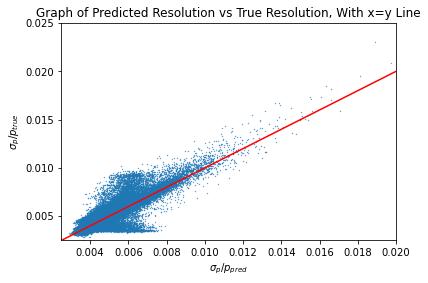

In [19]:
# Plot to compare the predicted vs true data
plt.scatter(predicted,target,s=0.1)
plt.plot(np.arange(0,len(target),1),np.arange(0,len(target),1),color='red')
plt.title("Graph of Predicted Resolution vs True Resolution, With x=y Line")
plt.xlabel("$\sigma_p$/$p_{pred}$")
plt.ylabel("$\sigma_p$/$p_{true}$")
plt.xlim(0.0025,0.02)
plt.ylim(0.0025,0.025)
plt.show()

Most of these values lie along the line except for isolated clusters either side of the line. 

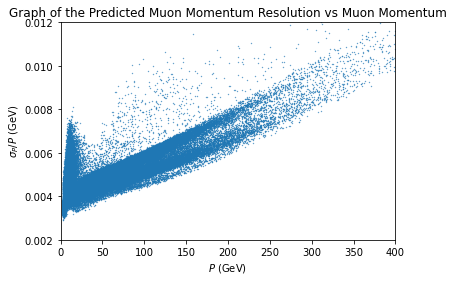

In [20]:
# Plot of predicted resolution as a function of true momentum
plt.scatter(chi_regression.p,predicted,s=0.1)
plt.title("Graph of the Predicted Muon Momentum Resolution vs Muon Momentum")
plt.ylabel("$\sigma_{P}$/$P$ (GeV)")
plt.xlabel("$P$ (GeV)")
plt.xlim(0,400)
plt.ylim(0.002,0.012)
plt.show()

This plot looks very similar to the one made in Question 1. Therefore, the neural network is good at predicting the momentum resolution given the momentum and positional data.